<a href="https://colab.research.google.com/github/casten/CovidGraphs/blob/master/CovidGraphs_CACounties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#utils

In [0]:
import numpy as np
import pandas as pd

# Gets top 10 counties by final case count
def getTopTenCountiesBySize(data, key):
  end_date = pd.to_datetime(data['date']).max()
  latest_numbers = data[pd.to_datetime(data['date']) == end_date]
  byCases = latest_numbers.sort_values(key, ascending=False)
  return byCases[0:10]


Load data for NYT github site, merge county + state data, remove unneeded cols, cleanup

In [9]:

dfAllCountiesData = pd.read_csv("https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv?raw=true") #, nrows=1000)
dfAllCountiesData.drop(columns=['fips'])
dfAllCountiesData.drop(columns=['deaths'])


,date,county,state,fips,cases
0,2020-01-21,Snohomish,Washington,53061.0,1
1,2020-01-22,Snohomish,Washington,53061.0,1
2,2020-01-23,Snohomish,Washington,53061.0,1
3,2020-01-24,Cook,Illinois,17031.0,1
4,2020-01-24,Snohomish,Washington,53061.0,1
...,...,...,...,...,...
209594,2020-06-05,Sweetwater,Wyoming,56037.0,32
209595,2020-06-05,Teton,Wyoming,56039.0,100
209596,2020-06-05,Uinta,Wyoming,56041.0,19
209597,2020-06-05,Washakie,Wyoming,56043.0,38


In [10]:
dfCaCountiesData = dfAllCountiesData[dfAllCountiesData['state'].eq("California")]
counties = pd.unique(dfCaCountiesData['county'])
dfCaCountiesNoLAData = dfCaCountiesData[dfCaCountiesData['county']!= "Los Angeles"]
countiesNoLA = pd.unique(dfCaCountiesNoLAData['county'])

print(f'Number of US Counties: {len(counties)}')
print(f'Number of US Counties(Excluding LA): {len(countiesNoLA)}')



Number of US Counties: 59
Number of US Counties(Excluding LA): 58


#All CA Counties by Case Count
(no labels)

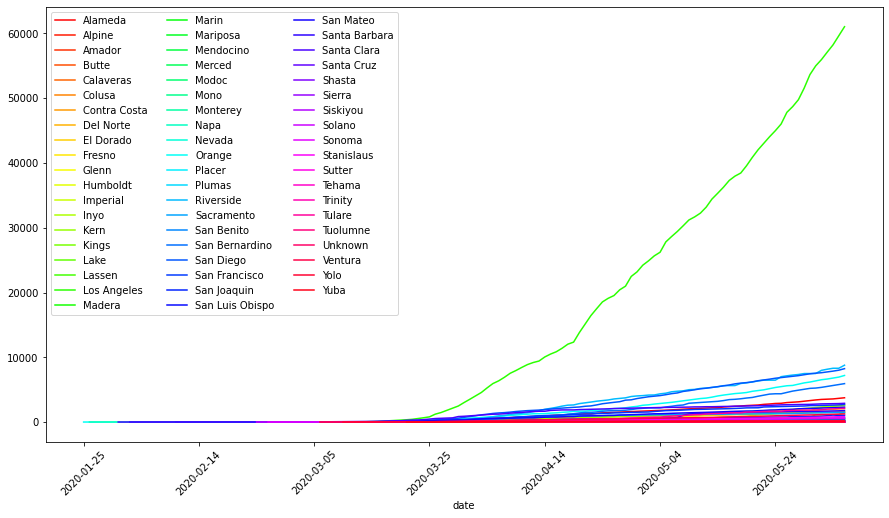

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

piv2 = dfCaCountiesData.pivot(index='date' , columns='county', values='cases')
ax = piv2.plot(figsize=(15,8), colormap='hsv', rot=45)
ax.legend(ncol=3)

#All CA Counties Exclusing LA

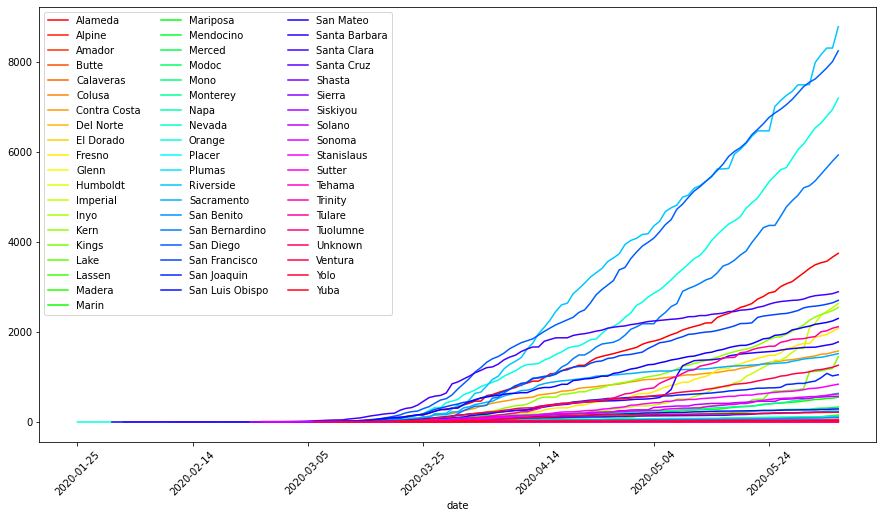

In [12]:
piv3 = dfCaCountiesNoLAData.pivot(index='date' , columns='county', values='cases')
ax2 = piv3.plot(figsize=(15,8), colormap='hsv', rot=45)
ax2.legend(ncol=3)

----------------
Limit to top 10 by final case count

In [0]:
topTen = getTopTenCountiesBySize(dfCaCountiesData, 'cases')

dfTopTenCounties = dfCaCountiesData[dfCaCountiesData['county'].isin(topTen['county'])]

dfTopTenCounties.index = pd.to_datetime(dfTopTenCounties['date'])
dfTopTenCounties.drop(columns=['date'])
piv = dfTopTenCounties.pivot(index='date' , columns='county', values='cases')

dfTopTenCountiesNoLA = dfTopTenCounties[dfTopTenCounties['county'] != 'Los Angeles']
pivNoLA = dfTopTenCountiesNoLA.pivot(index='date' , columns='county', values='cases')

# Top Ten Counties by Total Case Count
since 3/20

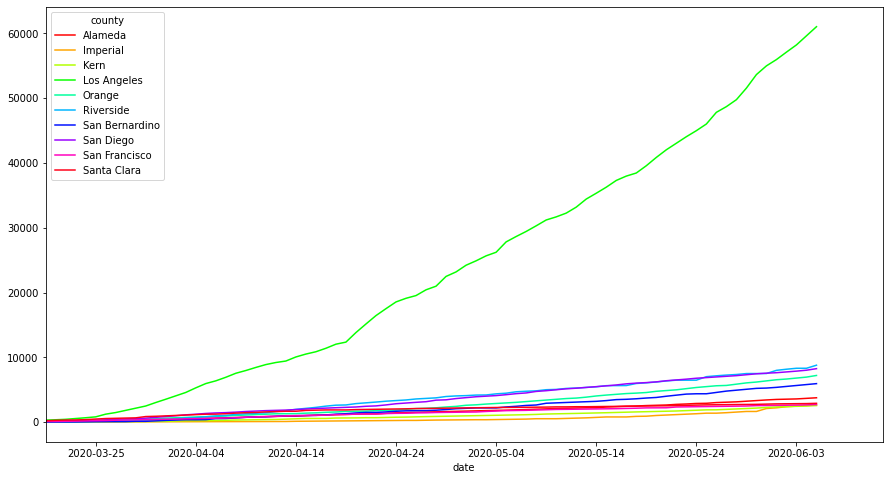

In [14]:
axes = piv.plot(figsize=(15,8), xlim=piv.index.get_loc('2020-03-20'), colormap='hsv')

# Top Ten Counties by Total Case Count (Excluding LA)
since 3/20

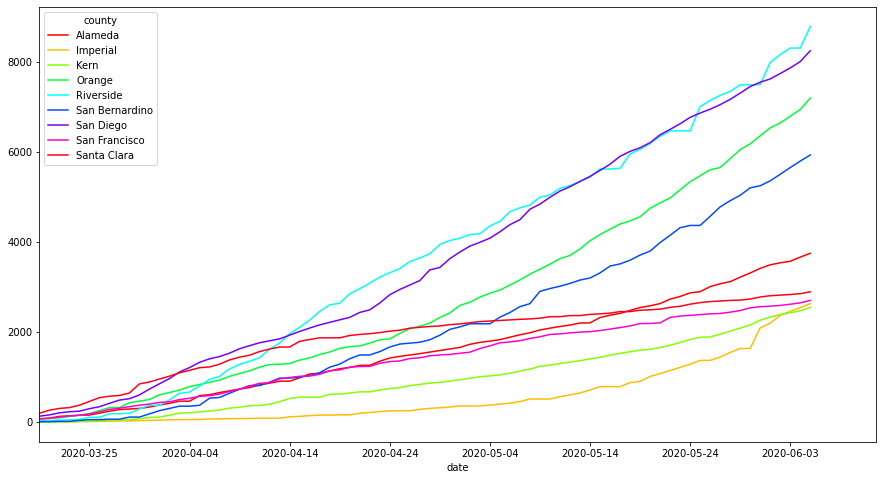

In [15]:
axes = pivNoLA.plot(figsize=(15,8), xlim=piv.index.get_loc('2020-03-20'), colormap='hsv')

# Top 10 Cases per day from May 1 Onward 

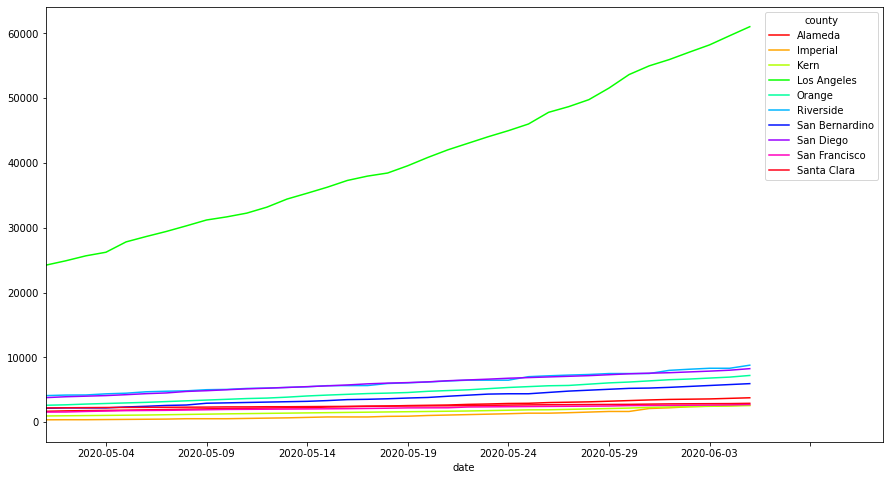

In [16]:
piv.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), colormap='hsv')

# Top 10 Cases per day from May 1 Onward (Excluding LA) 

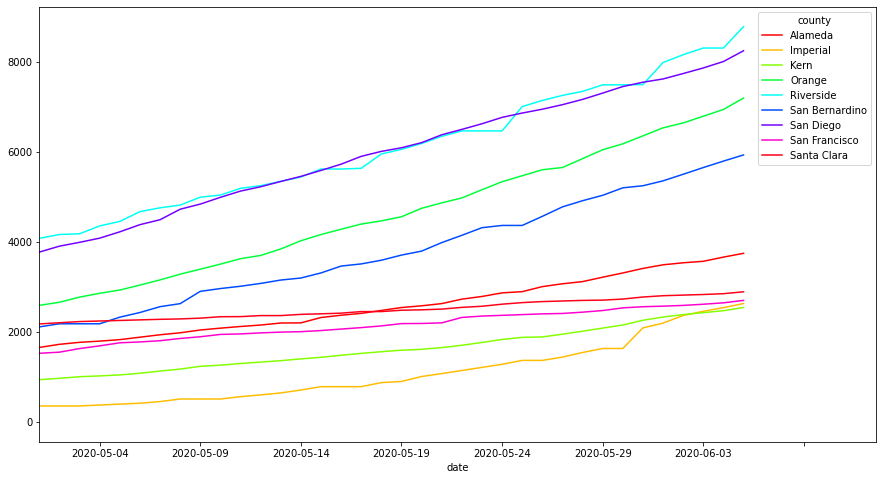

In [17]:
pivNoLA.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), colormap='hsv')

# Rates averaged over 7 day period May 1 Onward
0 means no new cases (the absolute best case)
Higher numbers mean larger weekly rates.

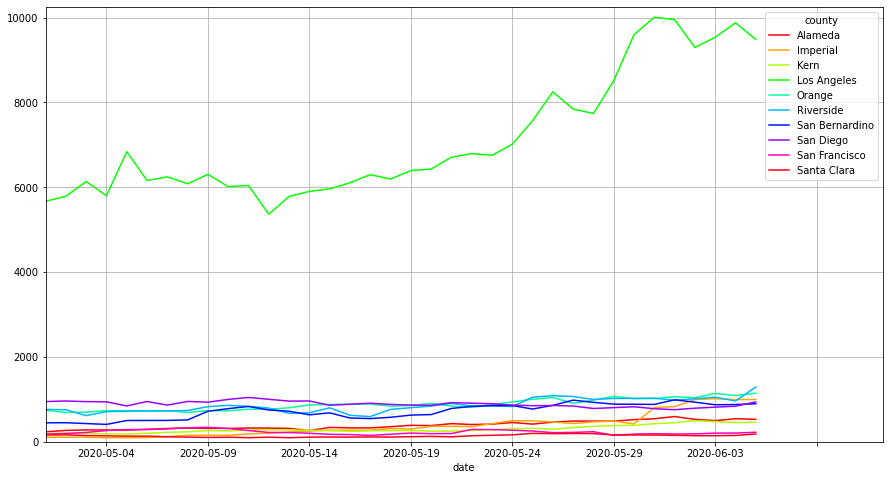

In [18]:
diff = piv.diff(periods=7)
diff.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), ylim = (0,10250), grid=True, colormap='hsv')

# Rates averaged over 7 day period May 1 Onward (Excluding LA)
0 means no new cases (the absolute best case)

Higher numbers mean larger weekly rates.

E.g. 1000 = 1000 new cases a week

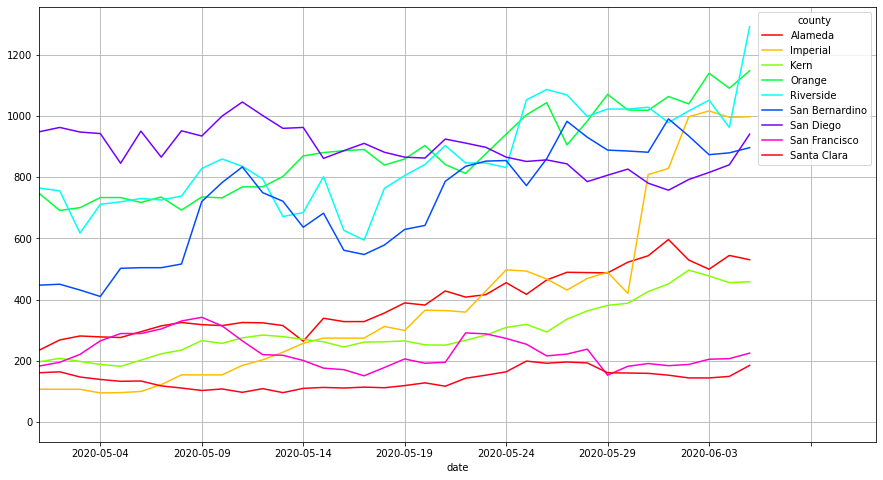

In [19]:
diffNoLA = pivNoLA.diff(periods=7)
diffNoLA.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), grid=True, colormap='hsv')

# Changes in Rate Over 7 Days May 1 Onward
Positive numbers indicate lack of control.  Negative indicate things are getting better. 

Note that 0 means no change in rate.  

This graph is showing who is improving their rate and not how well they are doing overall.

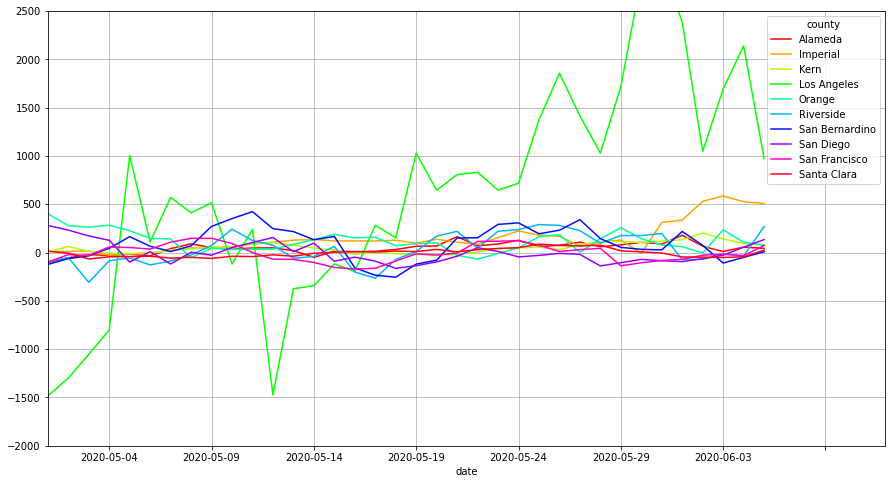

In [20]:
diff2 = diff.diff(periods=7)
diff2.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), ylim=(-2000,2500), grid=True, colormap='hsv')

# Changes in Rate Over 7 Days May 1 Onward (Excluding LA)
see graph above or interpretation details

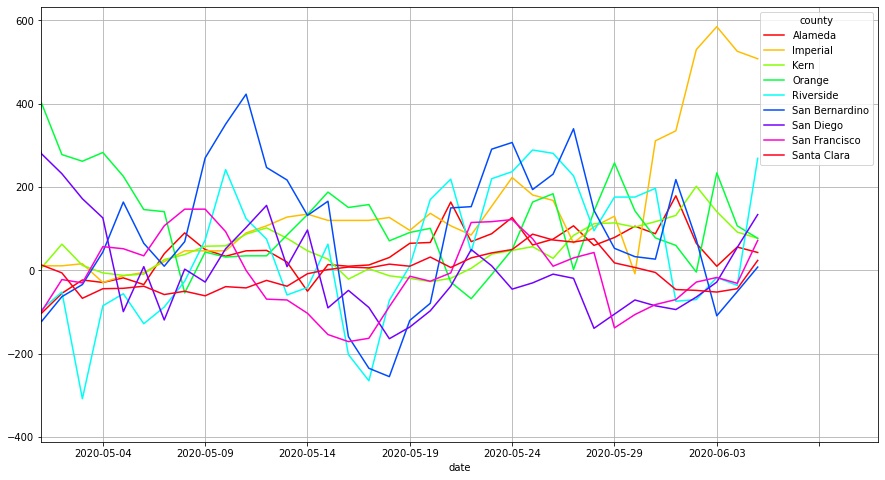

In [21]:
diff2NoLA = diffNoLA.diff(periods=7)
diff2NoLA.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), grid=True, colormap='hsv')